Student Performance Indicator


Life cycle of Machine Learning

In [1]:
# .understanding The problem Statement
# .Data Collection
# .Data checks to perform
# .Exploratory Data analysis
# .Data preprocessing
# .model Training
# .Choose the best mode


1) Problem statement:
This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.

2) Data Collection
Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import the csd datat as pandas dataframe

In [3]:
df=pd.read_csv('stud.csv')

sample of 6 record

In [4]:
df.sample(5)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
693,female,group D,associate's degree,standard,none,77,77,73
469,male,group C,some college,standard,none,91,74,76
718,female,group C,high school,standard,none,76,76,74
349,male,group E,associate's degree,standard,none,87,74,76
519,female,group B,high school,free/reduced,completed,67,78,79


In [5]:
df.shape

(1000, 8)

data check the form

In [6]:
df.isnull().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there is no any null  value 

In [7]:
#checking the  duplicated value
df.duplicated().sum()
#there is no any duplicated value


0

In [8]:
#getting the overview of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
#checking the unique val of  every columns

df.nunique() 

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [10]:
#checking the statistics of data
df.describe() #IT ONLY FOR THE NUMERICAL DATAT

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [11]:
df


,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [12]:
# Exploring data
print('Categorical in gender features be ',end='')
print(df['gender'].unique())

print('Categorical in race_ethnicity features be ',end='')
print(df['race_ethnicity'].unique())

print('Categorical in parental_level_of_education features be ',end='')
print(df['parental_level_of_education'].unique())

print('Categorical in lunch features be ',end='')
print(df['lunch'].unique())

print('Categorical in test_preparation_course features be ',end='')
print(df['test_preparation_course'].unique())

print('Numerical in math_score features be ',end='')
print(df['math_score'].unique())

print('Numerical in reading_score	 features be ',end='')
print(df['reading_score'].unique())

print('Numerical in writing_score features be ',end='')
print(df['writing_score'].unique())

Categorical in gender features be ['female' 'male']
Categorical in race_ethnicity features be ['group B' 'group C' 'group A' 'group D' 'group E']
Categorical in parental_level_of_education features be ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categorical in lunch features be ['standard' 'free/reduced']
Categorical in test_preparation_course features be ['none' 'completed']
Numerical in math_score features be [ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Numerical in reading_score	 features be [ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37

In [13]:
for fe in df.columns:
   if df[fe].dtype=='O':
       print(fe)

gender
race_ethnicity
parental_level_of_education
lunch
test_preparation_course


In [14]:
#separating the numerical and categorical data

categorical_features=[features for features in df.columns if df[features].dtype=='O']
numerical_features=[features for features in df.columns if df[features].dtype!='O']

In [15]:
print(f'the number of categorical features is {len(categorical_features)}')
print(f'the number of categorical features is {len(numerical_features)}')



the number of categorical features is 5
the number of categorical features is 3


In [16]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [17]:
df['Total_score']=df['math_score']+df['reading_score']+df['writing_score']

In [18]:
df['Average_score']=df['Total_score']/3

In [19]:

df['Average_score']=round(df['Average_score'],2)

In [20]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


In [21]:
reading_full=df[df['reading_score']==100]['Average_score'].count()
reading_full

17

In [22]:
writing_full=df[df['writing_score']==100]['writing_score'].count()
writing_full

14

In [23]:
math_full=df[df['math_score']==100]['math_score'].count()
math_full

7

In [24]:
print(f'The number of students with full marks in reading_full:{reading_full}')
print(f'The number of students with full marks in writing_full:{writing_full}')
print(f'The number of students with full marks in math_full:{math_full}')

The number of students with full marks in reading_full:17
The number of students with full marks in writing_full:14
The number of students with full marks in math_full:7


In [25]:
reading_less_20=df[df['reading_score']<=20]['Average_score'].count()
writing_less_20=df[df['writing_score']<=20]['Average_score'].count()
math_less_20=df[df['math_score']<=20]['Average_score'].count()


In [26]:
reading_less_20,writing_less_20,math_less_20

(1, 3, 4)

In [27]:
print(f'Number of student with less than 20 marks in maths:{reading_less_20}')
print(f'Number of student with less than 20 marks in maths:{writing_less_20}')
print(f'Number of student with less than 20 marks in maths:{math_less_20}')

Number of student with less than 20 marks in maths:1
Number of student with less than 20 marks in maths:3
Number of student with less than 20 marks in maths:4


In [28]:
# insight 
# from above values we get student have performed the worst in math
#Best from the performance is reading section
# 4 Exploiring visualize
# Histogram
# Kernel distribution function(kde)


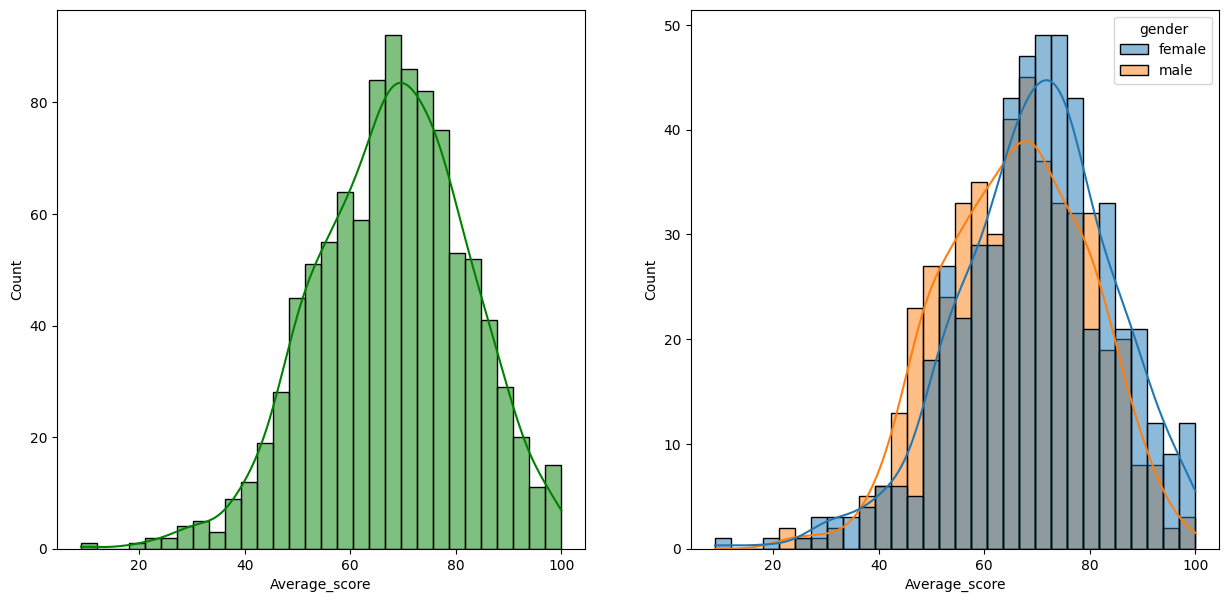

In [29]:
# histogram & kde
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,hue='gender')
plt.show()

In [30]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


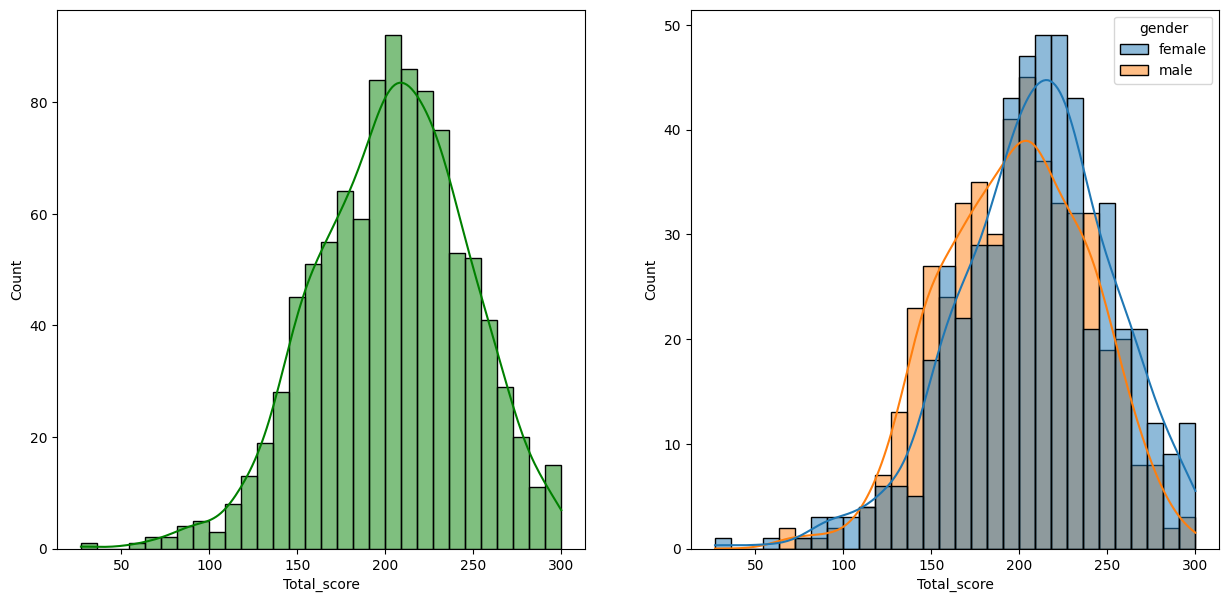

In [31]:
# insights
plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,color='g')

plt.subplot(122)
sns.histplot(data=df,x='Total_score',bins=30,kde=True,hue='gender')
plt.show()

Text(0.5, 1.0, 'Analysis of FeMale on their Average_Score vs Counts')

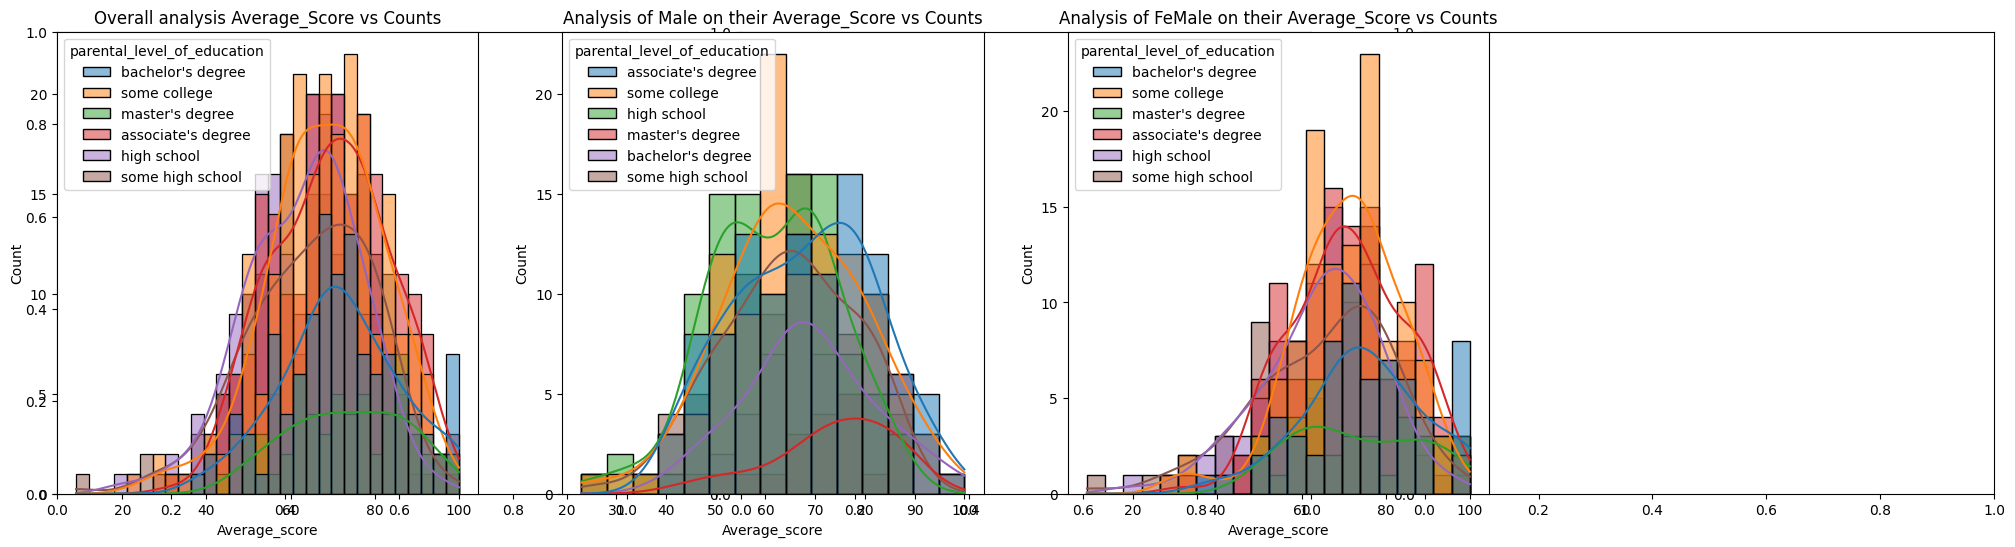

In [32]:
# histogram & kde between averga score and parental_level_oe_education
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='Average_score',bins=30,kde=True,hue='parental_level_of_education')
plt.title("Overall analysis Average_Score vs Counts")
# plt.subplot(122)
plt.subplot(142)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.title("Analysis of Male on their Average_Score vs Counts")


plt.subplot(143)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='parental_level_of_education')
plt.title("Analysis of FeMale on their Average_Score vs Counts")



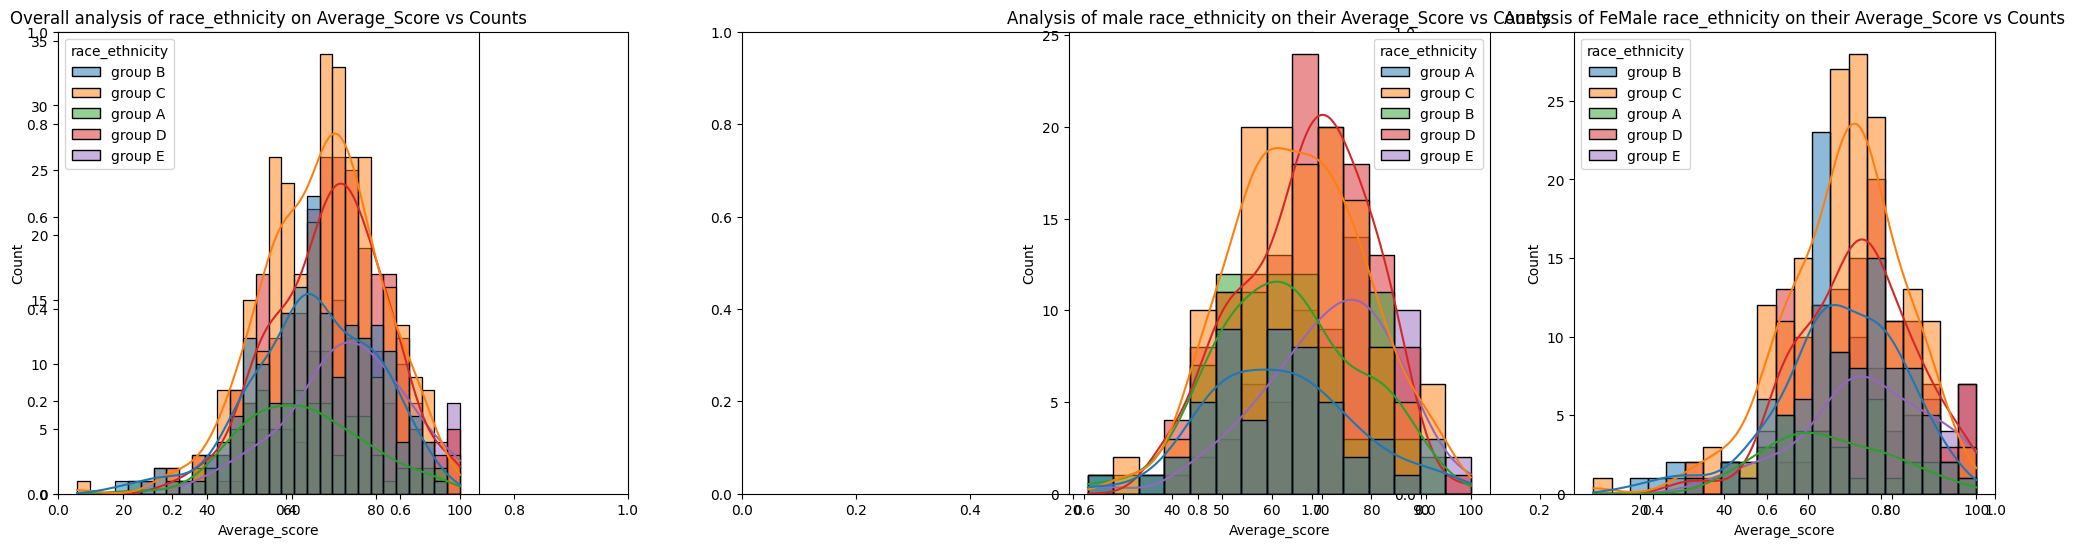

In [33]:
# histogram & kde between averga score and parental_level_oe_education

plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)

sns.histplot(data=df,x='Average_score',bins=30,kde=True,hue='race_ethnicity')
plt.title("Overall analysis of race_ethnicity on Average_Score vs Counts")

# plt.subplot(122)
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='Average_score',kde=True,hue='race_ethnicity')
plt.title("Analysis of male race_ethnicity on their Average_Score vs Counts")


plt.subplot(144)
sns.histplot(data=df[df.gender=='female'],x='Average_score',kde=True,hue='race_ethnicity')
plt.title("Analysis of FeMale race_ethnicity on their Average_Score vs Counts")
plt.show()


Insights::
In general parent's education don't help student perform well in exam.
2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
3rd plot we can see there is no effect of parent's education on female students.

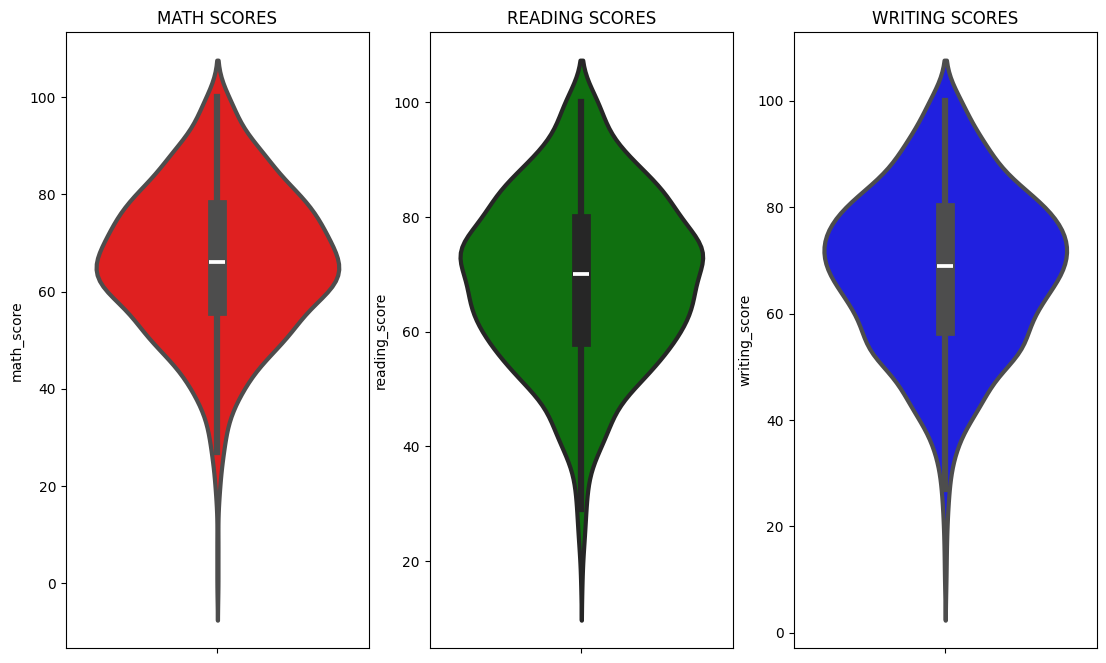

In [34]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y=df['math_score'],data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y=df['reading_score'],data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y=df['writing_score'],data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

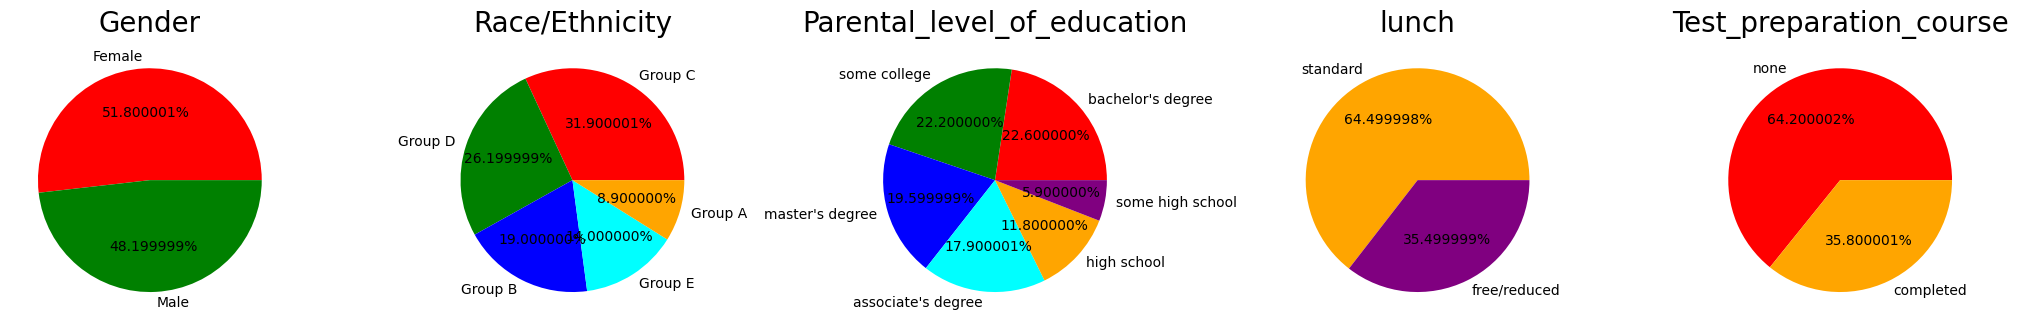

In [77]:
# 4.3 Multivariate analysis using pieplot
plt.rcParams['figure.figsize'] = (20, 6)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = ['Female', 'Male']
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
# plt.show()




plt.subplot(1, 5, 2)
size = df['race_ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')
# plt.show()



plt.subplot(1, 5, 3)
size = df['parental_level_of_education'].value_counts()
labels=["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school']
color = ['red', 'green', 'blue', 'cyan','orange','purple']
plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Parental_level_of_education', fontsize = 20)
plt.axis('off')
# plt.show()



plt.subplot(1, 5, 4)
size = df['lunch'].value_counts()
labels=['standard', 'free/reduced']

color = ['orange','purple']
plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('lunch', fontsize = 20)
plt.axis('off')
# plt.show()




plt.subplot(1, 5, 5)
size = df['test_preparation_course'].value_counts()
labels=['none', 'completed']

color = ['red','orange']
plt.pie(size, colors = color,labels = labels,autopct = '%2f%%')
plt.title('Test_preparation_course', fontsize = 20)
plt.axis('off')

plt.tight_layout()
plt.grid()
plt.show()





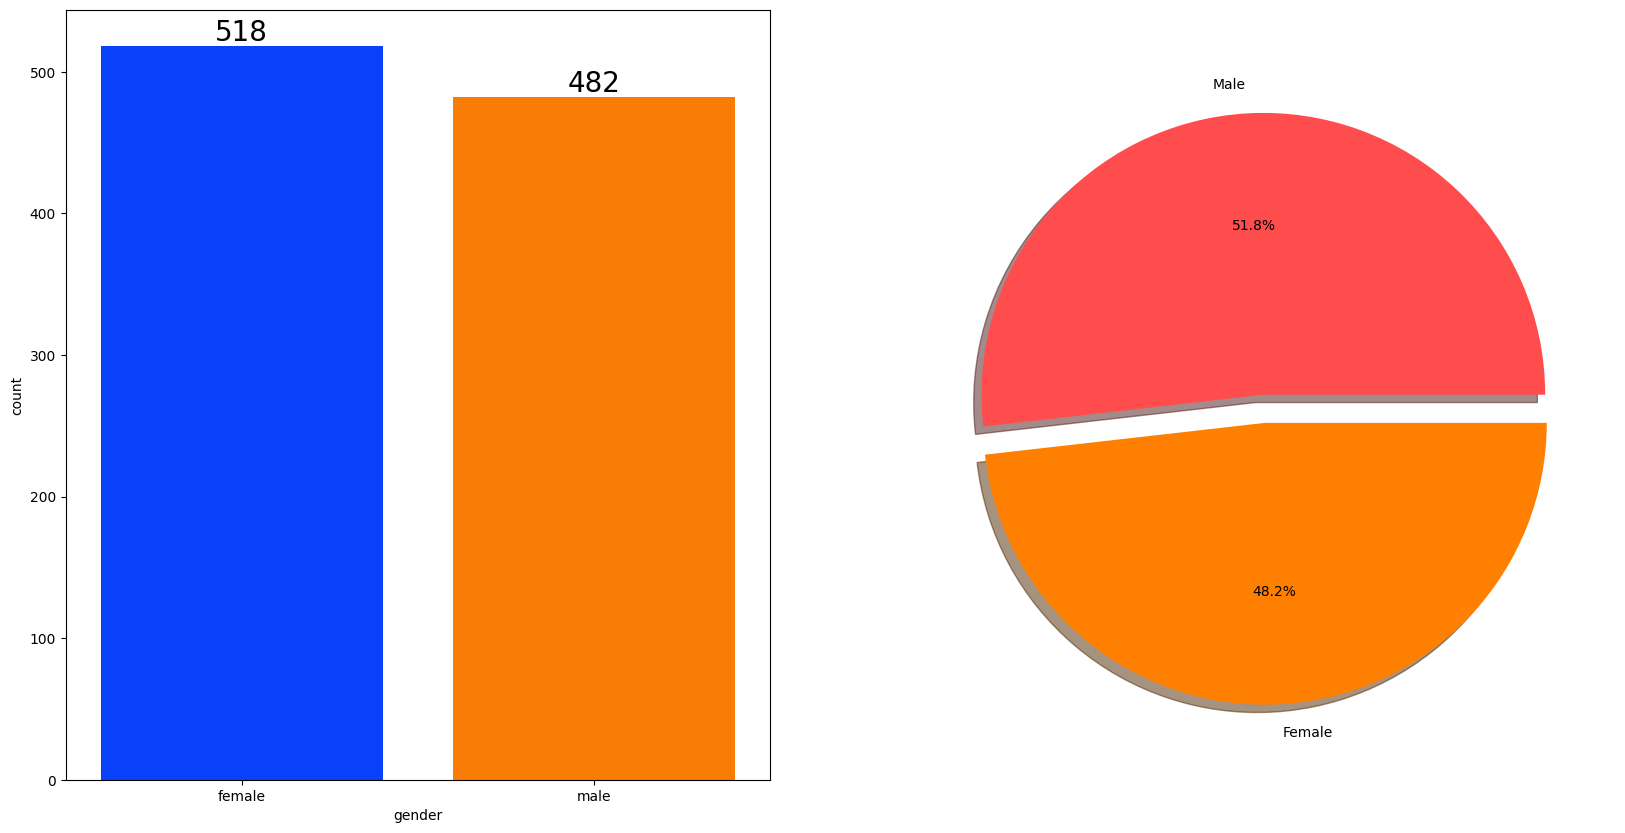

In [78]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'],data=df,palette ='bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x=df['gender'].value_counts(),labels=['Male','Female'],explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()

In [81]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


In [82]:
gender_group=df.groupby('gender').mean()

TypeError: agg function failed [how->mean,dtype->object]

In [73]:
df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total_score,Average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


(-1.25, 1.25, -1.25, 1.25)

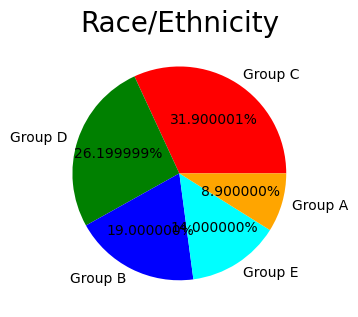